In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#data에 csv파일 입력
data = pd.read_csv('insurance.csv')
print(data.shape)
print(data.head())

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
# esx 데이터 1과 0으로 변환
#data['sex'] = data['sex'].map({'male':1,'female':-1}) # female에 0보다는 -1 값이 더 나음
#print(data.head())

# smoker 데이터 1과 0으로 변환
#data['smoker'] = data['smoker'].map({'yes':1,'no':-1}) # 이하 동문
#print(data.head())

# region 데이터 지역별로 1,2,3,4 변환
#data['region'] = data['region'].map({'northwest':1, 'northeast':2,'southwest':3, 'southeast':4})
#print(data.head(20))

In [3]:
# 저 위 방법 보다는 밑에 거 활용해서 값 추출하는 것이 좋음
# 성별이 남자인지, 여자인지 각각의 feature로 만들어주기 위해 컬럼을 새로 생성

# sex
data['male'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)
data['female'] = data['sex'].apply(lambda x: 1 if x == 'female' else 0)

# smoke
data['smoke'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data['nonsmoke'] = data['smoker'].apply(lambda x: 1 if x == 'no' else 0)

# region
data['northwest'] = data['region'].apply(lambda x: 1 if x == 'northwest' else 0)
data['northeast'] = data['region'].apply(lambda x: 1 if x == 'northeast' else 0)
data['southwest'] = data['region'].apply(lambda x: 1 if x == 'southwest' else 0)
data['southeast'] = data['region'].apply(lambda x: 1 if x == 'southeast' else 0)
print(data.head())

   age     sex     bmi  children smoker     region      charges  male  female  \
0   19  female  27.900         0    yes  southwest  16884.92400     0       1   
1   18    male  33.770         1     no  southeast   1725.55230     1       0   
2   28    male  33.000         3     no  southeast   4449.46200     1       0   
3   33    male  22.705         0     no  northwest  21984.47061     1       0   
4   32    male  28.880         0     no  northwest   3866.85520     1       0   

   smoke  nonsmoke  northwest  northeast  southwest  southeast  
0      1         0          0          0          1          0  
1      0         1          0          0          0          1  
2      0         1          0          0          0          1  
3      0         1          1          0          0          0  
4      0         1          1          0          0          0  


In [4]:
# train, test 데이터 나누기 비율 8:2
from sklearn.model_selection import train_test_split

X = data[['age', 'bmi','male','female', 'children', 'smoke', 'nonsmoke', 'northwest', 'northeast', 'southwest', 'southeast']]
y = data[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

     age     bmi  male  female  children  smoke  nonsmoke  northwest  \
506   22  31.350     1       0         1      0         1          1   
993   38  28.270     1       0         1      0         1          0   
212   24  28.500     1       0         2      0         1          1   
755   31  27.645     1       0         2      0         1          0   
311   19  24.700     0       1         0      0         1          0   

     northeast  southwest  southeast  
506          0          0          0  
993          0          0          1  
212          0          0          0  
755          1          0          0  
311          0          1          0  
      age     bmi  male  female  children  smoke  nonsmoke  northwest  \
167    32  33.155     0       1         3      0         1          1   
605    51  34.100     0       1         0      0         1          0   
1191   41  21.755     0       1         1      0         1          0   
440    31  32.680     0       1         1

In [5]:
#모델 생성
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#Clr = LinearRegression(normalize = True)
Clr = Ridge(alpha=100, normalize = True)
Clr.fit(X_train, y_train)

Ridge(alpha=100, normalize=True)

In [6]:
# age, sex, bmi, children, smoker, region 순서
# (male = 1, female = 0)
# (smoker = 1 , nonsmoker = 0)
# (region, 'northwest':0, 'northeast':0,'southwest':0, 'southeast':0) 사는 곳에 1
# [['age', 'bmi','male','female', 'children', 'smoke', 'nonsmoke', 'northwest', 'northeast', 'southwest', 'southeast']]
my_Info = [[25, 25.82, 1, 0, 0, 0, 1, 1, 0, 0, 0]]
my_predict = Clr.predict(my_Info)
my_predict

array([[12623.02169526]])

In [7]:
# TEST DATA와 비교,
y_predict = Clr.predict(X_test)
y_predict

array([[12676.07839116],
       [12723.74228155],
       [12659.27518957],
       [12657.44156818],
       [13095.78881665],
       [12707.96811824],
       [12672.27564869],
       [12696.23070742],
       [13060.84581141],
       [12711.51662222],
       [12693.81514927],
       [12653.96187962],
       [12721.37995534],
       [12668.00137949],
       [12655.52531721],
       [12702.33119793],
       [13223.77421317],
       [13189.34443802],
       [12669.54862495],
       [12729.00244237],
       [12690.78727449],
       [13170.36591579],
       [12607.61541869],
       [13068.87977193],
       [12598.09206213],
       [12624.03253611],
       [12722.05457768],
       [13069.3511546 ],
       [12669.12058527],
       [12623.26896124],
       [13065.61938056],
       [12755.04231592],
       [12755.49011109],
       [12730.71575966],
       [12729.76280277],
       [12697.85985194],
       [12770.65647037],
       [12704.56882955],
       [12609.19986703],
       [12700.0464124 ],


In [8]:
# 기울기, 절편확인
Clr.coef_

array([[   2.52960775,    3.03800207,    4.46527495,   -4.46527495,
           7.33208213,  224.85139962, -224.85139962,   -6.44339355,
           3.28432299,  -10.17028097,   12.28328405]])

In [9]:
Clr.intercept_

array([12708.16980632])

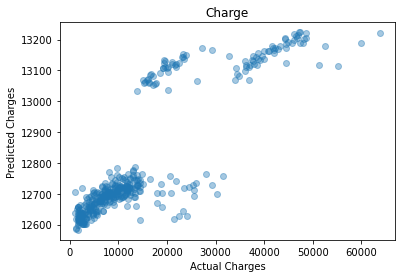

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Charge")
plt.show()

In [11]:
# smoker와 charge의 corelation 확인
#np.corrcoef(np.array(data['smoker']), np.array(data['charge']))
#np.array(data['smoker'])
print(np.corrcoef(np.array(data['age']), np.array(data['charges'])))

print(np.corrcoef(np.array(data['male']), np.array(data['charges'])))

print(np.corrcoef(np.array(data['bmi']), np.array(data['charges'])))

print(np.corrcoef(np.array(data['children']), np.array(data['charges'])))

print(np.corrcoef(np.array(data['smoke']), np.array(data['charges'])))

print(np.corrcoef(np.array(data['nonsmoke']), np.array(data['charges'])))

[[1.         0.29900819]
 [0.29900819 1.        ]]
[[1.         0.05729206]
 [0.05729206 1.        ]]
[[1.         0.19834097]
 [0.19834097 1.        ]]
[[1.         0.06799823]
 [0.06799823 1.        ]]
[[1.         0.78725143]
 [0.78725143 1.        ]]
[[ 1.         -0.78725143]
 [-0.78725143  1.        ]]


In [13]:
# 평균 정확도, 값에 얼마나 가까운가 1에 가까울 수록 정확도 높음
# score(self, X, y[, sample_weight])
#Return the coefficient of determination R^2 of the prediction.

print(Clr.score(X_test, y_test))#sample_weight = None))

0.01017191001783413


In [14]:
# RMSE(Root Mean Squared Error)
# linear regression 모델은 RMSE 활용하여 모델 평가
from sklearn.metrics import mean_squared_error
from math import sqrt

#RMSE = mean_squared_error(y_test, y_predict, squared = False)
RMSE = sqrt(mean_squared_error(y_test, y_predict))
RMSE

#print(y_test.shape)
#print(y_predict.shape)

13121.243395969112

In [15]:
#mse = mean_squared_error(y_test, y_predict)
#rmse = sqrt(mse)
#print('RMSE: %f' % rmse)

In [16]:
#n = len(y_predict)
#rmse = np.linalg.norm(y_predict - y_test) / np.sqrt(n)
#rmse